# 🛫 Havayolu Yolcu Memnuniyeti Analizi
## Final Projesi – Veri Ön İşleme & Keşifsel Veri Analizi (EDA)

Bu proje kapsamında, bir havayolu şirketinin sağladığı yolcu verileri üzerinden memnuniyeti etkileyen unsurlar analiz edilecektir. Bu analiz;

- Veriyi tanıma,
- Eksik ve aykırı değerleri tespit etme,
- Sayısal ve kategorik değişkenlerin dağılımını inceleme

gibi temel EDA (Exploratory Data Analysis) adımlarını içermektedir.

In [178]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Görselleştirmelerde Türkçe karakterler için ayar
plt.rcParams['font.family'] = 'DejaVu Sans'

##  Veri Seti Seçimi ve Tanımı

Proje için seçilen veri seti `train.csv`, toplam **103.904 satır** ve **25 sütundan** oluşmaktadır.  
Veri seti, yolcu demografik bilgileri, uçuş tipi, hizmet kalitesi değerlendirmeleri, uçuş gecikmeleri ve hedef değişken olan memnuniyet (`satisfaction`) bilgisini içermektedir.

- **Hangi faktörlerin memnun veya memnuniyetsiz yolcularla yüksek korelasyona sahip olduğu,**
- **Yolcu memnuniyetinin bu faktörler temelinde tahmin edilip edilemeyeceğidir.**

## Veri Seti Özellikleri

| Özellik                       | Açıklama                                                          |
|------------------------------|------------------------------------------------------------------|
| **Gender (Cinsiyet)**         | Yolcuların cinsiyeti (Kadın, Erkek)                             |
| **Customer Type (Müşteri Türü)** | Müşteri türü (Sadık müşteri, Sadık olmayan müşteri)            |
| **Age (Yaş)**                 | Yolcuların gerçek yaşı                                           |
| **Type of Travel (Seyahat Türü)** | Uçuş amacı (Kişisel seyahat, İş seyahati)                     |
| **Class (Sınıf)**             | Yolcunun uçtuğu sınıf (Business, Ekonomi, Ekonomi Plus)          |
| **Flight Distance (Uçuş Mesafesi)** | Yolculuğun uçuş mesafesi                                    |
| **Inflight wifi service (Uçuş içi wifi hizmeti)** | Wifi hizmeti memnuniyet seviyesi (0: Uygulanamaz; 1-5 arası) |
| **Departure/Arrival time convenient (Kalkış/Varış zamanı uygunluğu)** | Zaman uygunluğu memnuniyeti                    |
| **Ease of Online booking (Online rezervasyon kolaylığı)** | Online rezervasyon memnuniyeti                   |
| **Gate location (Kapı konumu)** | Kapı konumu memnuniyeti                                      |
| **Food and drink (Yiyecek ve içecek)** | Yiyecek ve içecek memnuniyeti                             |
| **Online boarding (Online biniş)** | Online biniş memnuniyeti                                   |
| **Seat comfort (Koltuk konforu)** | Koltuk konforu memnuniyeti                                  |
| **Inflight entertainment (Uçuş içi eğlence)** | Uçuş içi eğlence memnuniyeti                             |
| **On-board service (Uçuş içi servis)** | Uçuş içi servis memnuniyeti                               |
| **Leg room service (Bacak mesafesi servisi)** | Bacak mesafesi memnuniyeti                              |
| **Baggage handling (Bagaj işlemleri)** | Bagaj işlemleri memnuniyeti                               |
| **Check-in service (Check-in servisi)** | Check-in servisi memnuniyeti                              |
| **Inflight service (Uçuş içi hizmet)** | Uçuş içi hizmet memnuniyeti                               |
| **Cleanliness (Temizlik)**    | Temizlik memnuniyeti                                           |
| **Departure Delay in Minutes (Kalkış gecikmesi dakika olarak)** | Kalkış gecikme süresi (dakika)                    |
| **Arrival Delay in Minutes (Varış gecikmesi dakika olarak)** | Varış gecikme süresi (dakika)                      |
| **Satisfaction (Memnuniyet)** | Havayolu memnuniyet seviyesi (Memnun, Nötr, Memnuniyetsiz)      |


In [182]:
# Veri setini yükle
train = pd.read_csv("train.csv")


In [187]:
# Gereksiz 'Unnamed: 0' sütununu düşürelim
train.drop(columns=["Unnamed: 0"], inplace=True)


In [184]:
# Boyut ve ilk 5 satır
print(" Veri seti boyutu:", train.shape)
train.head()

 Veri seti boyutu: (103904, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## İstatistiksel Özet – Sayısal Değişkenler

Sayısal değişkenler üzerinden merkezi eğilim (ortalama, medyan), dağılım (standart sapma), minimum ve maksimum gibi temel istatistikler aşağıda sunulmuştur.


In [148]:
# Sayısal değişkenleri seç
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Temel istatistiksel özet
train[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [150]:
# Genişletilmiş istatistiksel özet
summary_df = pd.DataFrame(index=numeric_cols)
summary_df['Ortalama'] = train[numeric_cols].mean()
summary_df['Medyan'] = train[numeric_cols].median()
summary_df['Standart Sapma'] = train[numeric_cols].std()
summary_df['Minimum'] = train[numeric_cols].min()
summary_df['Maksimum'] = train[numeric_cols].max()
summary_df['Çeyrek 1 (Q1)'] = train[numeric_cols].quantile(0.25)
summary_df['Çeyrek 3 (Q3)'] = train[numeric_cols].quantile(0.75)
summary_df['Çarpıklık (Skewness)'] = train[numeric_cols].apply(skew)
summary_df['Basıklık (Kurtosis)'] = train[numeric_cols].apply(kurtosis)
summary_df = summary_df.round(2)

#İstatiksel Özet
summary_df

,Ortalama,Medyan,Standart Sapma,Minimum,Maksimum,Çeyrek 1 (Q1),Çeyrek 3 (Q3),Çarpıklık (Skewness),Basıklık (Kurtosis)
id,64924.21,64856.5,37463.81,1.0,129880.0,32533.75,97368.25,0.00,-1.20
Age,39.38,40.0,15.11,7.0,85.0,27.00,51.00,-0.00,-0.72
Flight Distance,1189.45,843.0,997.15,31.0,4983.0,414.00,1743.00,1.11,0.27
Inflight wifi service,2.73,3.0,1.33,0.0,5.0,2.00,4.00,0.04,-0.85
Departure/Arrival time convenient,3.06,3.0,1.53,0.0,5.0,2.00,4.00,-0.33,-1.04
Ease of Online booking,2.76,3.0,1.40,0.0,5.0,2.00,4.00,-0.02,-0.91
Gate location,2.98,3.0,1.28,0.0,5.0,2.00,4.00,-0.06,-1.03
Food and drink,3.20,3.0,1.33,0.0,5.0,2.00,4.00,-0.15,-1.15
Online boarding,3.25,3.0,1.35,0.0,5.0,2.00,4.00,-0.45,-0.70
Seat comfort,3.44,4.0,1.32,0.0,5.0,2.00,5.00,-0.48,-0.93


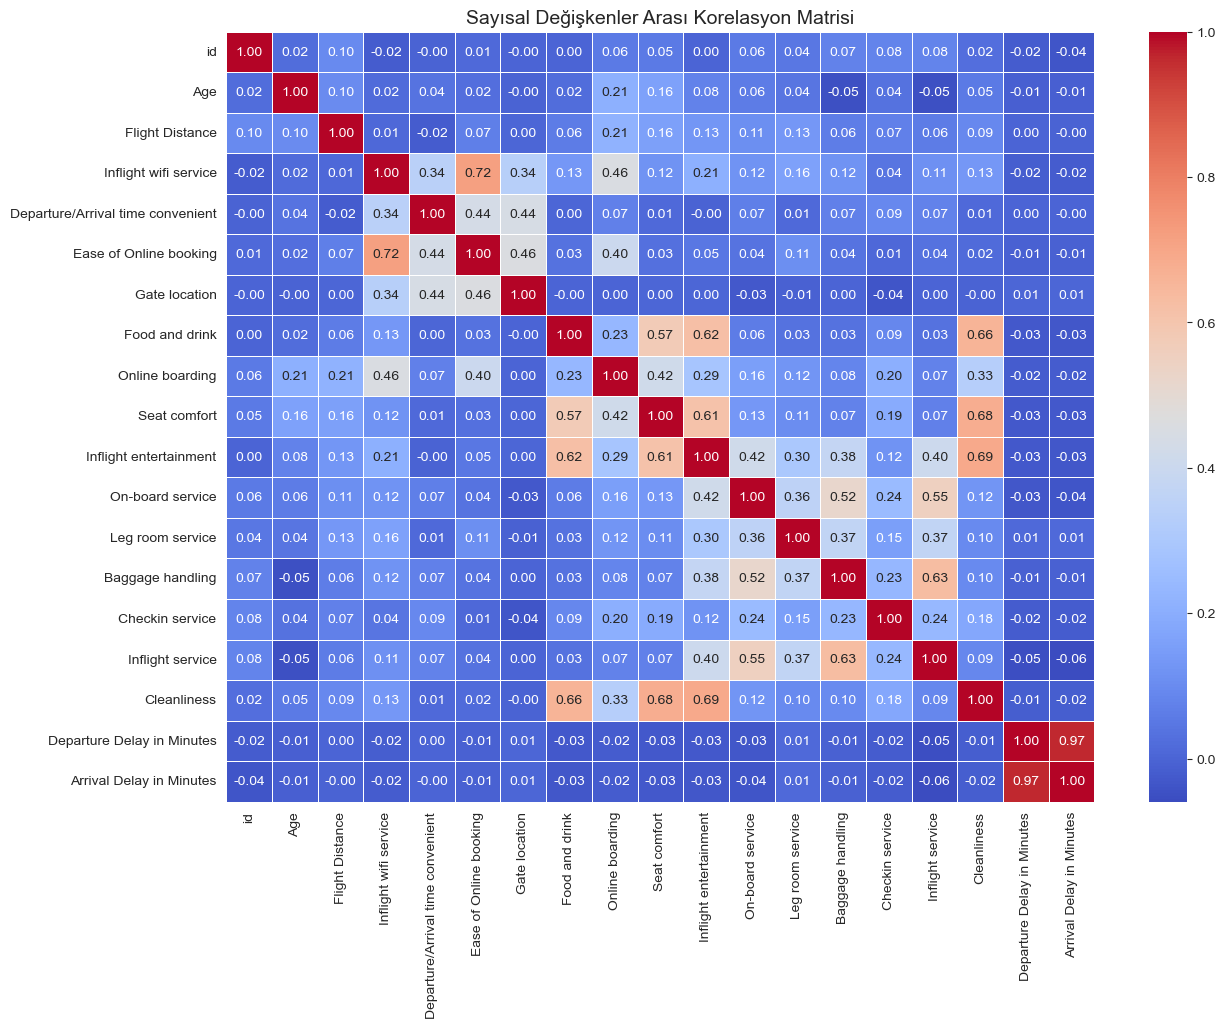

In [282]:
# Korelasyon matrisi
corr = train[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Sayısal Değişkenler Arası Korelasyon Matrisi", fontsize=14)
plt.show()


# Korelasyon Matrisi Analizi

Aşağıda uçuş deneyimi verisindeki değişkenlerin korelasyon ilişkileri incelenmiştir. Korelasyon katsayısı [-1, 1] aralığında olup, 1 mükemmel pozitif, -1 mükemmel negatif ilişkiyi ifade eder.

---

## Öne Çıkan Bulgular

- **Departure Delay in Minutes** ile **Arrival Delay in Minutes** arasında çok yüksek pozitif korelasyon bulunmaktadır: **0.96**.  
  - Bu, kalkış gecikmesinin varış gecikmesini doğrudan etkilediğini göstermektedir.

- **Inflight wifi service** ile aşağıdaki değişkenler arasında güçlü pozitif ilişkiler vardır:  
  - **Ease of Online booking** (0.72)  
  - **Departure/Arrival time convenient** (0.34)  
  - **Gate location** (0.34)

- Hizmet kalitesi değişkenleri arasında yüksek korelasyonlar görülmektedir:  
  - **Food and drink** ↔ **Seat comfort**: 0.57  
  - **Food and drink** ↔ **Inflight entertainment**: 0.62  
  - **Food and drink** ↔ **Cleanliness**: 0.66  
  - **Seat comfort** ↔ **Inflight entertainment**: 0.61  
  - **Inflight entertainment** ↔ **Cleanliness**: 0.69

- **Age** ve **Flight Distance** arasında zayıf pozitif bir korelasyon vardır: **0.10**.

- Yaş ile hizmet kalitesi veya gecikme değişkenleri arasında anlamlı bir ilişki gözlemlenmemiştir.

---

## Genel Değerlendirme

- Hizmet kalitesi unsurları birbiriyle pozitif ilişki göstermektedir, bu da yolcuların genel memnuniyetini yansıtabilir.  
- Gecikmeler (kalkış ve varış) birbirine oldukça bağlıdır.  
- Online hizmetlere ilişkin değişkenler (wifi, online rezervasyon kolaylığı, gate konumu) birbirleriyle ilişkilidir.  
- Yaş ve uçuş mesafesi, diğer değişkenlerden nispeten bağımsızdır.




## Eksik Değer Analizi

Veri setindeki eksik değerler aşağıda sayısal ve yüzdesel olarak özetlenmiştir. Eksik verinin yalnızca bir sütunda ve düşük oranla (yaklaşık %0.30) bulunduğu görülmektedir.


In [154]:
# Eksik değer sayısı ve yüzdesi
missing = train.isnull().sum()
missing_percent = 100 * missing / len(train)

# Eksik veri içeren sütunları göster
missing_df = pd.DataFrame({
    "Eksik Değer Sayısı": missing[missing > 0],
    "Yüzde (%)": missing_percent[missing > 0]
})

missing_df


,Eksik Değer Sayısı,Yüzde (%)
Arrival Delay in Minutes,310,0.298352


### Eksik Değer Analizi

Veri setinde yalnızca `Arrival Delay in Minutes` değişkeninde eksik gözlemler bulunmaktadır. Toplam 310 eksik değer, tüm veri setinin yaklaşık %0.3’üne karşılık gelmektedir.

Bu değişken, uçuş memnuniyeti açısından doğrudan etkili olan bir özelliktir. Eksik verilerin doğrudan silinmesi, potansiyel bilgi kaybına ve bazı gruplarda temsil eksikliğine neden olabilir. Bu nedenle silmek yerine anlamlı bir şekilde doldurulması tercih edilmiştir.

#### Seçilen Yöntem: Segment Bazlı Medyan ile Doldurma

Eksik veriler, yolcunun **seyahat tipi** (`Type of Travel`) ve **uçuş sınıfı** (`Class`) bilgileri dikkate alınarak segmentlere ayrılmış, her grup için medyan gecikme süresi hesaplanarak eksik değerler bu şekilde doldurulmuştur.

Bu yöntem sayesinde:
- Her müşteri segmenti için karakteristik bir gecikme süresi korunmuş olur.
- Aykırı değerlerin etkisi en aza indirilir (çünkü medyan kullanılmıştır).
- Gecikme ile memnuniyet arasındaki ilişki korunmuş olur.



In [189]:
# Eksik değer doldurma öncesi kontrol
print("Doldurma öncesi eksik değer sayısı:", train['Arrival Delay in Minutes'].isnull().sum())

# Eksik değerleri doldurma (segment bazlı medyan)
train_filled = train.copy()
train_filled['Arrival Delay in Minutes'] = train_filled.groupby(['Type of Travel', 'Class'])['Arrival Delay in Minutes']\
                                                       .transform(lambda x: x.fillna(x.median()))

# Eksik değer doldurma sonrası kontrol
print("Doldurma sonrası eksik değer sayısı:", train_filled['Arrival Delay in Minutes'].isnull().sum())



Doldurma öncesi eksik değer sayısı: 310
Doldurma sonrası eksik değer sayısı: 0


### Eksik Değerler Doldurulmuş Yeni Veri Seti (train_filled)

Orijinal veri seti (`train`) korunarak, eksik değerleri doldurulmuş yeni bir kopya (`train_filled`) oluşturulmuştur.

Bu yaklaşım sayesinde:
- Orijinal veri üzerinde herhangi bir değişiklik yapılmaz,
- Eksik değerlerin doldurulmasının veri yapısına etkisi açıkça karşılaştırılabilir,
- Görselleştirme ve analizlerde kafa karışıklığı önlenmiş olur.

In [193]:

# Eksik Öncesi ve Sonrası Karşılaştırma
original = train['Arrival Delay in Minutes'].dropna()
filled = train_filled['Arrival Delay in Minutes']

imputation_comparison = pd.DataFrame({
    "İstatistik": ["count", "mean", "std", "min", "25%", "50%", "75%", "max"],
    "Eksik Değerler Hariç (train)": [
        original.count(),
        round(original.mean(), 2),
        round(original.std(), 2),
        round(original.min(), 2),
        round(original.quantile(0.25), 2),
        round(original.median(), 2),
        round(original.quantile(0.75), 2),
        round(original.max(), 2),
    ],
    "Doldurulmuş (train_filled)": [
        filled.count(),
        round(filled.mean(), 2),
        round(filled.std(), 2),
        round(filled.min(), 2),
        round(filled.quantile(0.25), 2),
        round(filled.median(), 2),
        round(filled.quantile(0.75), 2),
        round(filled.max(), 2),
    ]
})
print(imputation_comparison)



  İstatistik  Eksik Değerler Hariç (train)  Doldurulmuş (train_filled)
0      count                     103594.00                   103904.00
1       mean                         15.18                       15.13
2        std                         38.70                       38.65
3        min                          0.00                        0.00
4        25%                          0.00                        0.00
5        50%                          0.00                        0.00
6        75%                         13.00                       13.00
7        max                       1584.00                     1584.00


## Aykırı Değer (Outlier) Analizi

Aykırı değerler, veri analizinde model performansını ve istatistiksel sonuçları bozabileceği için dikkatle incelenmelidir.  
Bu bölümde:
- Boxplot grafiklerle görsel analiz yapılacak
- IQR yöntemiyle sayısal olarak aykırı değerler belirlenecektir

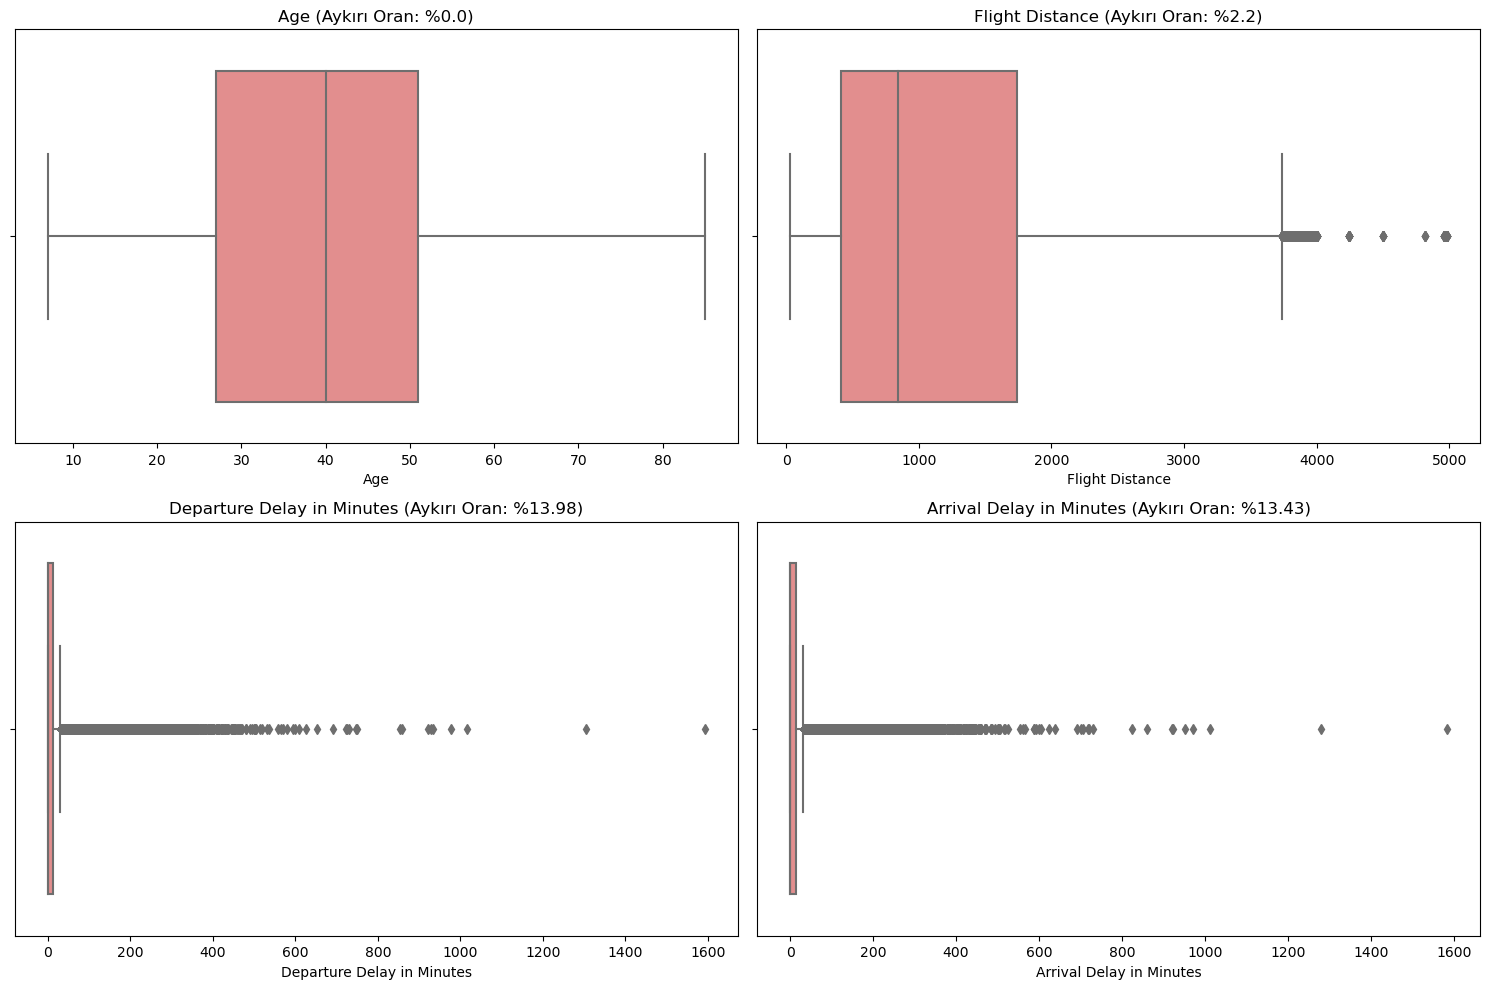

                            Toplam Gözlem  Aykırı Sayısı  Oran (%)
Age                              103904.0            0.0      0.00
Flight Distance                  103904.0         2291.0      2.20
Departure Delay in Minutes       103904.0        14529.0     13.98
Arrival Delay in Minutes         103904.0        13954.0     13.43


In [195]:
# Aykırı Değer Analizi (IQR)
outlier_summary = {}
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']):
    Q1 = train_filled[col].quantile(0.25)
    Q3 = train_filled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = train_filled[(train_filled[col] < lower) | (train_filled[col] > upper)]
    outlier_summary[col] = {
        "Toplam Gözlem": train_filled[col].shape[0],
        "Aykırı Sayısı": outliers.shape[0],
        "Oran (%)": round(100 * outliers.shape[0] / train_filled[col].shape[0], 2)
    }
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=train_filled[col], color='lightcoral')
    plt.title(f"{col} (Aykırı Oran: %{outlier_summary[col]['Oran (%)']})")
    plt.xlabel(col)

plt.tight_layout()
plt.show()
print(pd.DataFrame(outlier_summary).T)


### Aykırı Değer Analizi (IQR Yöntemi)

Sayısal değişkenlerde aykırı değer analizi, IQR (Interquartile Range) yöntemine göre gerçekleştirilmiştir. Aşağıdaki tabloda, her değişken için aykırı değer sayısı ve toplam veri içindeki oranı yer almaktadır:

| Değişken                     | Toplam Gözlem | Aykırı Değer Sayısı | Aykırı Oranı (%) |
|-----------------------------|----------------|----------------------|------------------|
| **Age**                     | 103,904        | 0                    | 0.00%            |
| **Flight Distance**         | 103,904        | 2,291                | 2.20%            |
| **Departure Delay (Min.)**  | 103,904        | 14,529               | 13.98%           |
| **Arrival Delay (Min.)**    | 103,904        | 13,954               | 13.43%           |

####  Yorumlar:
- **Age** değişkeninde aykırı değer bulunmamaktadır, bu değişken oldukça dengeli bir dağılıma sahiptir.
- **Flight Distance** için %2.2 oranında aykırı gözlem mevcuttur, bu oran kabul edilebilir düzeydedir.
- **Departure Delay** ve **Arrival Delay** değişkenlerinde ise yaklaşık **%14 civarında yüksek oranlarda aykırı değer** mevcuttur.

Bu durum, uçuş gecikmelerinin bazı uçuşlarda çok ekstrem değerlere ulaşabildiğini göstermektedir. Ancak bu aykırı değerler, veri girişi hatası değil, uçuşların doğasında olan yüksek gecikmeler olabilir. Bu nedenle bu değerler doğrudan silinmemelidir.




### Gözlemler (Boxplot Yorumu)

- `Age` değişkeni genelde normal dağılmış, çok az aykırı değer var.
- `Flight Distance` değişkeninde özellikle 3000 km ve üzeri mesafelerde aykırılıklar var.
- `Departure` ve `Arrival Delay` değişkenlerinde **çok sayıda yüksek gecikme** outlier olarak görülmektedir.


### Aykırı Değerlerle Ne Yapılmalı?

- `Flight Distance`: Üst limitteki outlier’lar uçuş çeşitliliğini temsil ediyor olabilir, silinmesi önerilmez.
- `Delay` (gecikme): Çok büyük değerler (>1000 dakika) aykırı olabilir, fakat uçuş iptali/aksama gibi önemli durumları da temsil ediyor olabilir.

**Yöntem önerisi:**
- Aykırı değerleri silmek yerine, `is_outlier` gibi bir işaretleyici sütun eklemek.
- Model eğitiminde outlier’lar için özel önlem almak.


##  Görselleştirme

Veri görselleştirme, değişkenlerin dağılımını ve değişkenler arası ilişkileri keşfetmek için kritik öneme sahiptir.  
Bu bölümde:

- Sayısal değişkenlerin histogram ve yoğunluk grafikleri (KDE)
- Kategorik değişkenlerin sütun ve pasta grafikleri


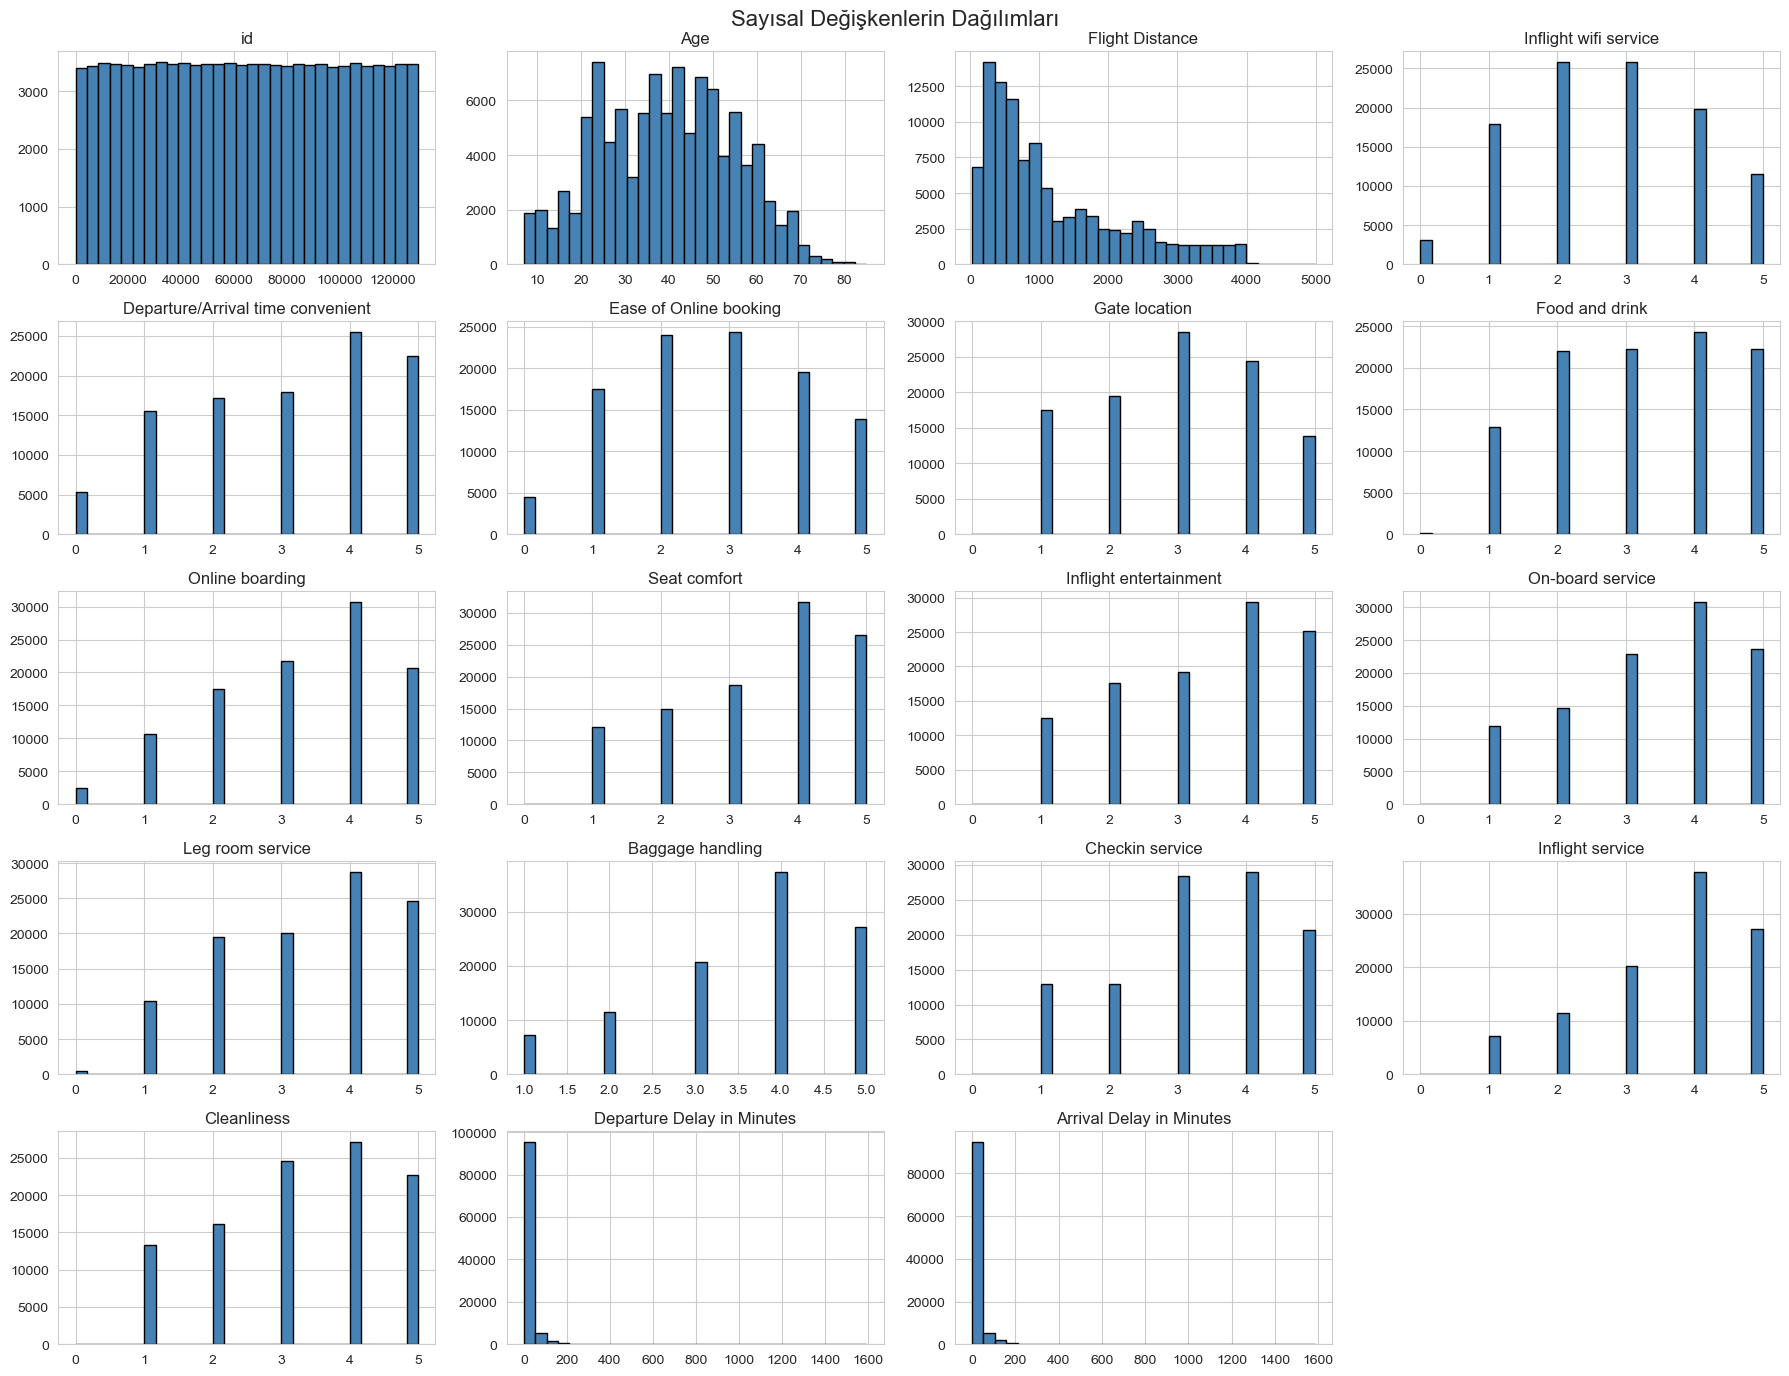

In [217]:
# Sayısal değişkenleri alalım
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Histogramlar
train[numeric_cols].hist(figsize=(18, 14), bins=30, color="steelblue", edgecolor="black")
plt.suptitle("Sayısal Değişkenlerin Dağılımları", fontsize=16)
plt.tight_layout()
plt.show()


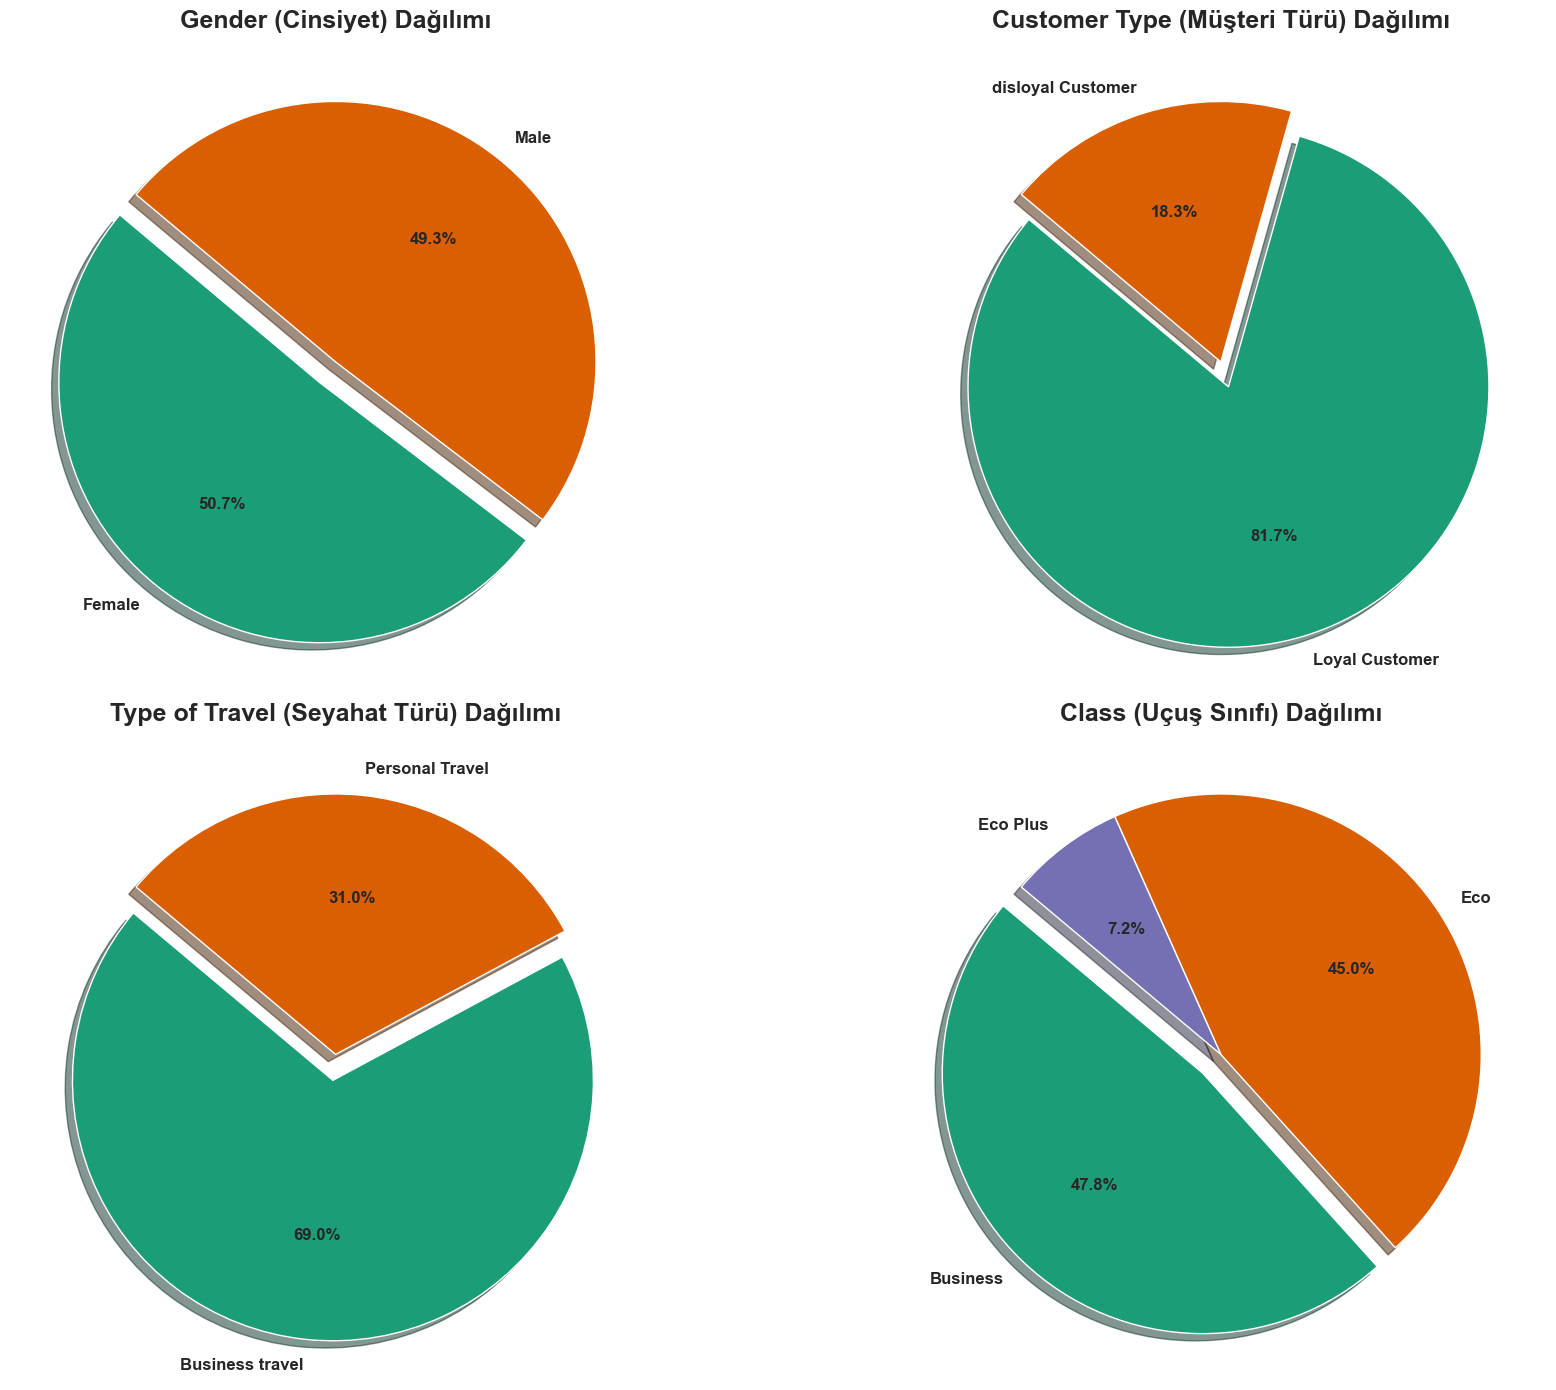

In [232]:
plt.figure(figsize=(20, 14))

palette = sns.color_palette("Dark2")  # Daha koyu ve canlı renkler

# Türkçe başlıkları eşleştirecek bir sözlük
col_titles = {
    "Gender": "Cinsiyet",
    "Customer Type": "Müşteri Türü",
    "Type of Travel": "Seyahat Türü",
    "Class": "Uçuş Sınıfı"
}

for i, col in enumerate(categorical_cols[:4], 1):
    plt.subplot(2, 2, i)
    counts = train[col].value_counts()
    
    explode = [0.1] + [0] * (len(counts) - 1)
    
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140,
            colors=palette[:len(counts)], explode=explode, shadow=True,
            textprops={'fontsize': 12, 'fontweight':'bold'})
    
    
    plt.title(f"{col} ({col_titles.get(col, col)}) Dağılımı", fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()


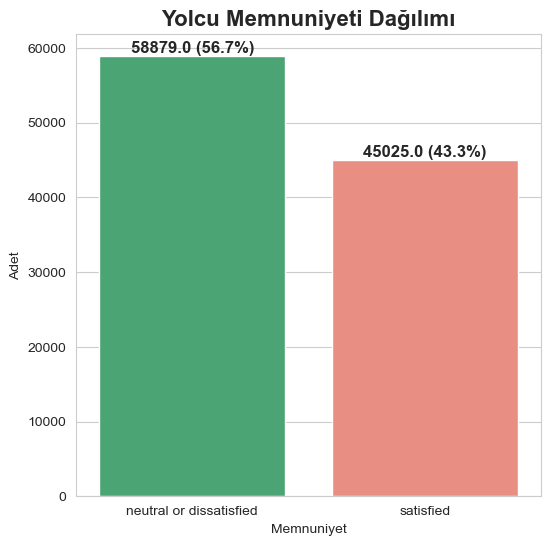

In [234]:
plt.figure(figsize=(6, 6))
sns.countplot(data=train, x="satisfaction", palette=["mediumseagreen", "salmon"])

plt.title("Yolcu Memnuniyeti Dağılımı", fontsize=16, fontweight='bold')
plt.xlabel("Memnuniyet")
plt.ylabel("Adet")

# Toplam gözlem sayısını al
total = len(train)

# Barların üstüne sayı ve yüzde yazma
ax = plt.gca()
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    label = f'{count} ({percentage:.1f}%)'
    ax.annotate(label, (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

## Memnuniyetsiz Yolcuların Analizi

Uçuş deneyimi verilerinde **"neutral or dissatisfied"** olarak işaretlenmiş yolcular analiz edilmiştir.  
Amacımız, bu yolcuların neden memnun olmadığını tespit etmek ve hizmet kalitesine dair iyileştirme yapılabilecek noktaları belirlemektir.

Analiz kapsamında şu adımlar izlenmiştir:

- Memnuniyetsiz yolcuların hizmet kalite puanları ile memnun yolcuların puanları karşılaştırılmıştır.
- Gecikme süreleri incelenmiş, logaritmik dönüşüm ile dağılım daha net şekilde analiz edilmiştir.
- Cinsiyet, müşteri türü, seyahat tipi ve uçuş sınıfı gibi kategorik değişkenlerin memnuniyetsizlikle ilişkisi incelenmiştir.


In [237]:
dissatisfied = train[train["satisfaction"] == "neutral or dissatisfied"]

In [239]:
quality_cols = [
    "Inflight wifi service", "Food and drink", "Online boarding", "Seat comfort",
    "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling",
    "Checkin service", "Inflight service", "Cleanliness"
]

# Gruplara göre ortalama
comparison = train.groupby("satisfaction")[quality_cols].mean().T
comparison.columns = ["Memnun Değil", "Memnun"]
comparison["Fark"] = comparison["Memnun"] - comparison["Memnun Değil"]
comparison = comparison.sort_values(by="Fark", ascending=False)
comparison


,Memnun Değil,Memnun,Fark
Online boarding,2.656125,4.027474,1.371348
Inflight entertainment,2.894156,3.964931,1.070775
Seat comfort,3.036295,3.966530,0.930235
On-board service,3.019158,3.857324,0.838166
Leg room service,2.990812,3.822143,0.831332
Cleanliness,2.936123,3.744342,0.808219
Inflight wifi service,2.399633,3.161288,0.761655
Checkin service,3.042952,3.646041,0.603089
Baggage handling,3.375991,3.966396,0.590405
Inflight service,3.388814,3.969461,0.580647


In [241]:
dissatisfied[quality_cols].mean().sort_values()


Inflight wifi service     2.399633
Online boarding           2.656125
Inflight entertainment    2.894156
Cleanliness               2.936123
Food and drink            2.958050
Leg room service          2.990812
On-board service          3.019158
Seat comfort              3.036295
Checkin service           3.042952
Baggage handling          3.375991
Inflight service          3.388814
dtype: float64

## Bulgular

###  Hizmet Kalitesi Farkları

Aşağıdaki tabloda, memnun ve memnun olmayan yolcuların hizmet kalitesine verdikleri ortalama puanlar karşılaştırılmıştır:

| Hizmet Kalitesi Özelliği      | Memnun Değil | Memnun | Fark |
|-------------------------------|--------------|--------|------|
| Online boarding               | 2.66         | 4.03   | **1.37** |
| Inflight entertainment        | 2.89         | 3.96   | **1.07** |
| Seat comfort                  | 3.04         | 3.97   | 0.93 |
| On-board service              | 3.02         | 3.86   | 0.84 |
| Leg room service              | 2.99         | 3.82   | 0.83 |
| Cleanliness                   | 2.94         | 3.74   | 0.81 |
| Inflight wifi service         | 2.40         | 3.16   | 0.76 |
| Checkin service               | 3.04         | 3.65   | 0.60 |
| Baggage handling              | 3.38         | 3.97   | 0.59 |
| Inflight service              | 3.39         | 3.97   | 0.58 |
| Food and drink                | 2.96         | 3.52   | 0.56 |

**En belirgin fark**, `Online boarding`, `Inflight entertainment` ve `Seat comfort` değişkenlerinde gözlemlenmiştir.  
Bu hizmet alanlarının iyileştirilmesi, memnuniyetsizlik oranlarını azaltabilir.




In [243]:
dissatisfied[["Departure Delay in Minutes", "Arrival Delay in Minutes"]].describe()


,Departure Delay in Minutes,Arrival Delay in Minutes
count,58879.000000,58697.000000
mean,16.503728,17.127536
std,40.191886,40.560248
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,15.000000,17.000000
max,1592.000000,1584.000000


###  Kalkış Gecikmeleri

Kalkış gecikmesi değişkeni sağa çarpık dağıldığı için logaritmik dönüşüm uygulanmıştır.  
Analiz sonucunda:

- Memnuniyetsiz yolcuların büyük bir kısmı, özellikle **yüksek gecikmelere maruz kalan** yolculardan oluşmaktadır.
- Gecikmeler, dolaylı olarak yolcu deneyimini ve memnuniyetini olumsuz etkilemektedir.

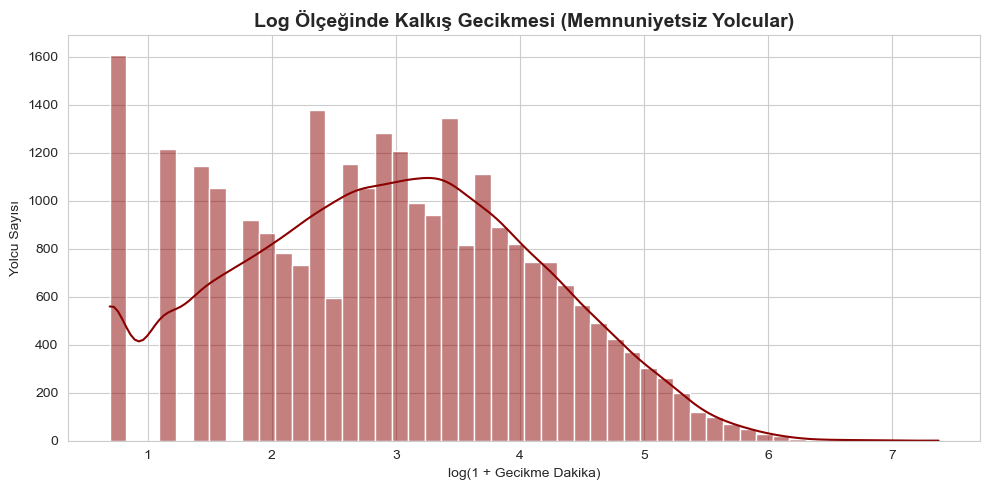

In [251]:
# Gecikme 0 olanları dışla çünkü log(0) tanımsızdır
nonzero_delays = dissatisfied[dissatisfied["Departure Delay in Minutes"] > 0]["Departure Delay in Minutes"]

plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(nonzero_delays), bins=50, kde=True, color="darkred")

plt.title("Log Ölçeğinde Kalkış Gecikmesi (Memnuniyetsiz Yolcular)", fontsize=14, fontweight='bold')
plt.xlabel("log(1 + Gecikme Dakika)")
plt.ylabel("Yolcu Sayısı")
plt.tight_layout()
plt.show()


###  Kategorik Özelliklere Göre Dağılım

Memnuniyetsiz yolcuların demografik ve seyahat bilgileri şu şekildedir:

- **Müşteri Türü:** Yeni müşteriler, sadık müşterilere kıyasla daha fazla memnuniyetsizlik göstermiştir.
- **Uçuş Sınıfı:** Ekonomi sınıfı yolcular arasında memnuniyetsizlik daha yaygındır.
- **Seyahat Türü:** İş seyahati yapan yolcular, tatil amaçlı seyahat edenlere göre daha yüksek memnuniyetsizlik oranına sahiptir.
- **Cinsiyet:** Memnuniyetsizlik oranı cinsiyetler arasında dengelidir ancak hafif farklar gözlemlenmiştir.


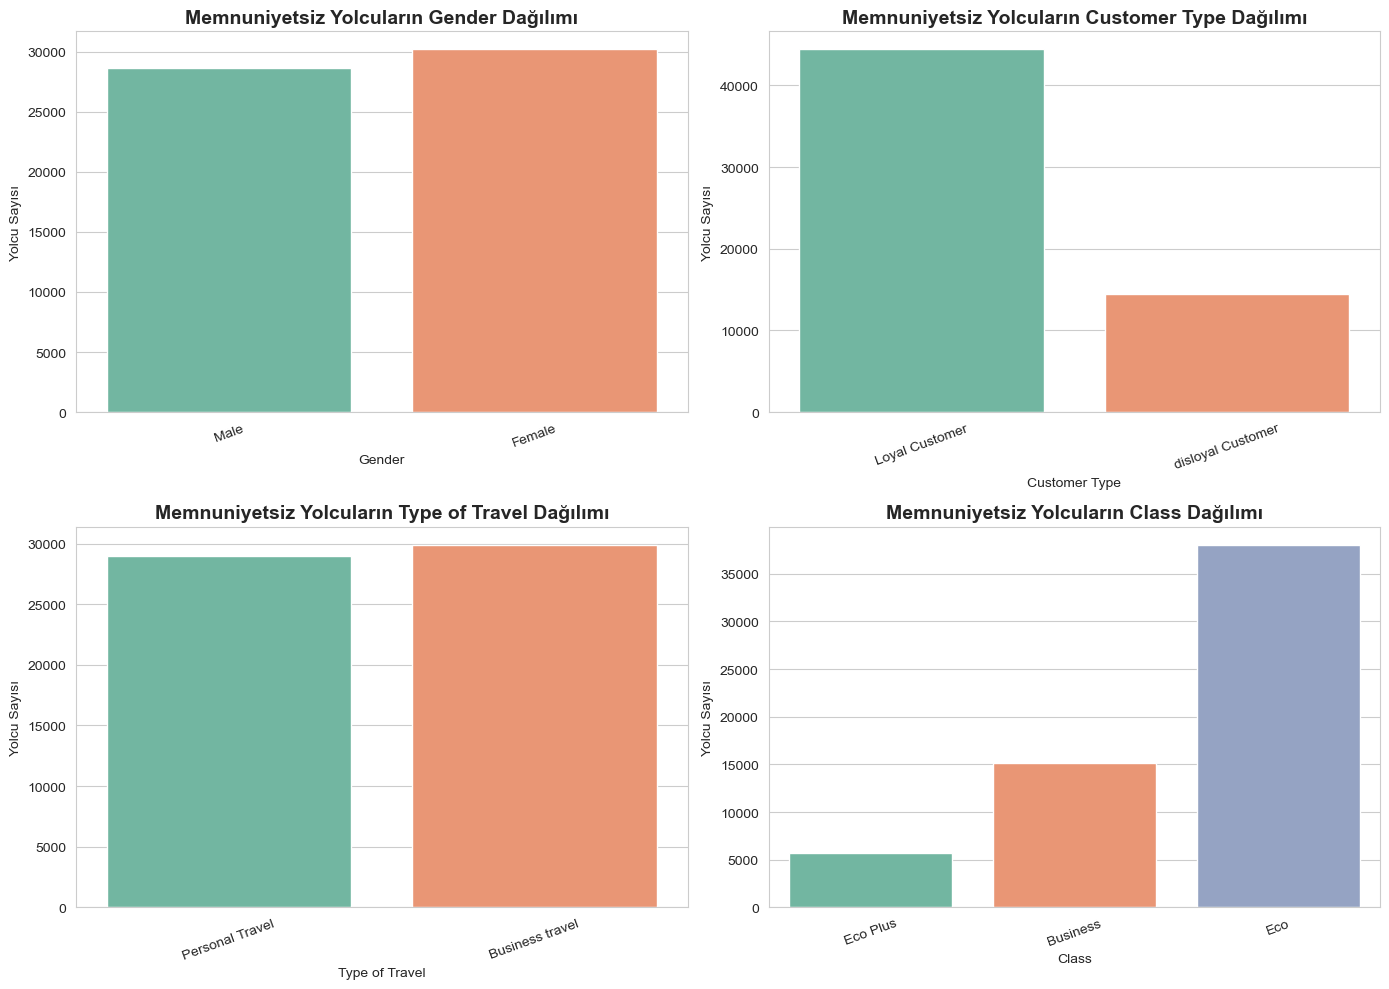

In [249]:

categorical_factors = ["Gender", "Customer Type", "Type of Travel", "Class"]
palette = sns.color_palette("Set2")  # Yeni renk paleti

plt.figure(figsize=(14, 10))

for i, col in enumerate(categorical_factors, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=dissatisfied, x=col, palette=palette)
    plt.title(f"Memnuniyetsiz Yolcuların {col} Dağılımı", fontsize=14, fontweight='bold')
    plt.ylabel("Yolcu Sayısı")
    plt.xlabel(col)
    plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

##  Sonuç

Bu analiz, memnuniyetsiz yolcuların büyük ölçüde:

- **düşük hizmet kalitesi puanları verdiği,**
- **yüksek gecikmelere maruz kaldığı** ve
- **özellikle ekonomi sınıfında, iş seyahati yapan ve yeni müşteri grubunda yoğunlaştığı**

göstermektedir.

**Memnuniyetsizlikleri Azaltma Yolları:**

- Online hizmetlerin (boarding, check-in) ve uçak içi konforun iyileştirilmesi,
- Gecikmeleri azaltmaya yönelik operasyonel iyileştirmeler,
- Ekonomi sınıfında sunulan hizmetlerde kalite artışı,

müşteri memnuniyetini artırmak adına kritik önem taşımaktadır.

# Memnuniyet Analizi 

Uçuş deneyiminden memnun kalan yolcuların profili detaylı olarak incelenmiştir. Memnuniyet düzeyini artıran hizmet kalitesi faktörleri ve yolcu demografik özellikleri analiz edilmiştir. Özellikle, yolcuların hangi hizmetlerden daha olumlu puanlar verdiği ve gecikmelerin memnuniyet üzerindeki etkisi değerlendirilmiştir.

Analiz sayesinde, yolcu memnuniyetini artırmak için öncelikli iyileştirme alanları belirlenmiş ve güçlü yönler ortaya konmuştur. Bu bilgiler, hava yolu şirketlerinin müşteri deneyimini geliştirmesine ve sadık müşteri kitlesini büyütmesine katkı sağlayacaktır.

In [262]:
satisfied = train[train["satisfaction"] == "satisfied"]


In [264]:
quality_cols = [
    "Inflight wifi service", "Food and drink", "Online boarding", "Seat comfort",
    "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling",
    "Checkin service", "Inflight service", "Cleanliness"
]

satisfied[quality_cols].mean().sort_values(ascending=False)


Online boarding           4.027474
Inflight service          3.969461
Seat comfort              3.966530
Baggage handling          3.966396
Inflight entertainment    3.964931
On-board service          3.857324
Leg room service          3.822143
Cleanliness               3.744342
Checkin service           3.646041
Food and drink            3.521310
Inflight wifi service     3.161288
dtype: float64

In [266]:
satisfied[["Departure Delay in Minutes", "Arrival Delay in Minutes"]].describe()


,Departure Delay in Minutes,Arrival Delay in Minutes
count,45025.000000,44897.000000
mean,12.608084,12.630799
std,35.382595,35.962008
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,9.000000,8.000000
max,1305.000000,1280.000000


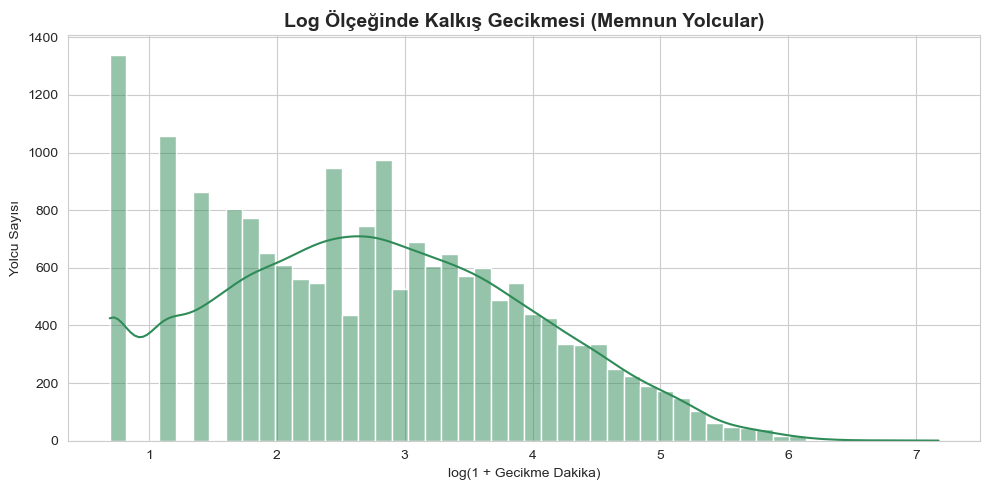

In [268]:
nonzero_delays_sat = satisfied[satisfied["Departure Delay in Minutes"] > 0]["Departure Delay in Minutes"]

plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(nonzero_delays_sat), bins=50, kde=True, color="seagreen")
plt.title("Log Ölçeğinde Kalkış Gecikmesi (Memnun Yolcular)", fontsize=14, fontweight='bold')
plt.xlabel("log(1 + Gecikme Dakika)")
plt.ylabel("Yolcu Sayısı")
plt.tight_layout()
plt.show()


###  Kategorik Değişken Dağılımları

| Değişken       | Kategori           | Adet   | Yüzde (%) |
|----------------|--------------------|--------|-----------|
| **Gender**     | Female             | 22,534 | 50.05     |
|                | Male               | 22,491 | 49.95     |
| **Customer Type** | Loyal Customer      | 40,533 | 90.02     |
|                | Disloyal Customer   | 4,492  | 9.98      |
| **Type of Travel** | Business travel     | 41,746 | 92.72     |
|                | Personal Travel     | 3,279  | 7.28      |
| **Class**      | Business           | 34,480 | 76.58     |
|                | Eco                | 8,701  | 19.32     |
|                | Eco Plus            | 1,844  | 4.10      |

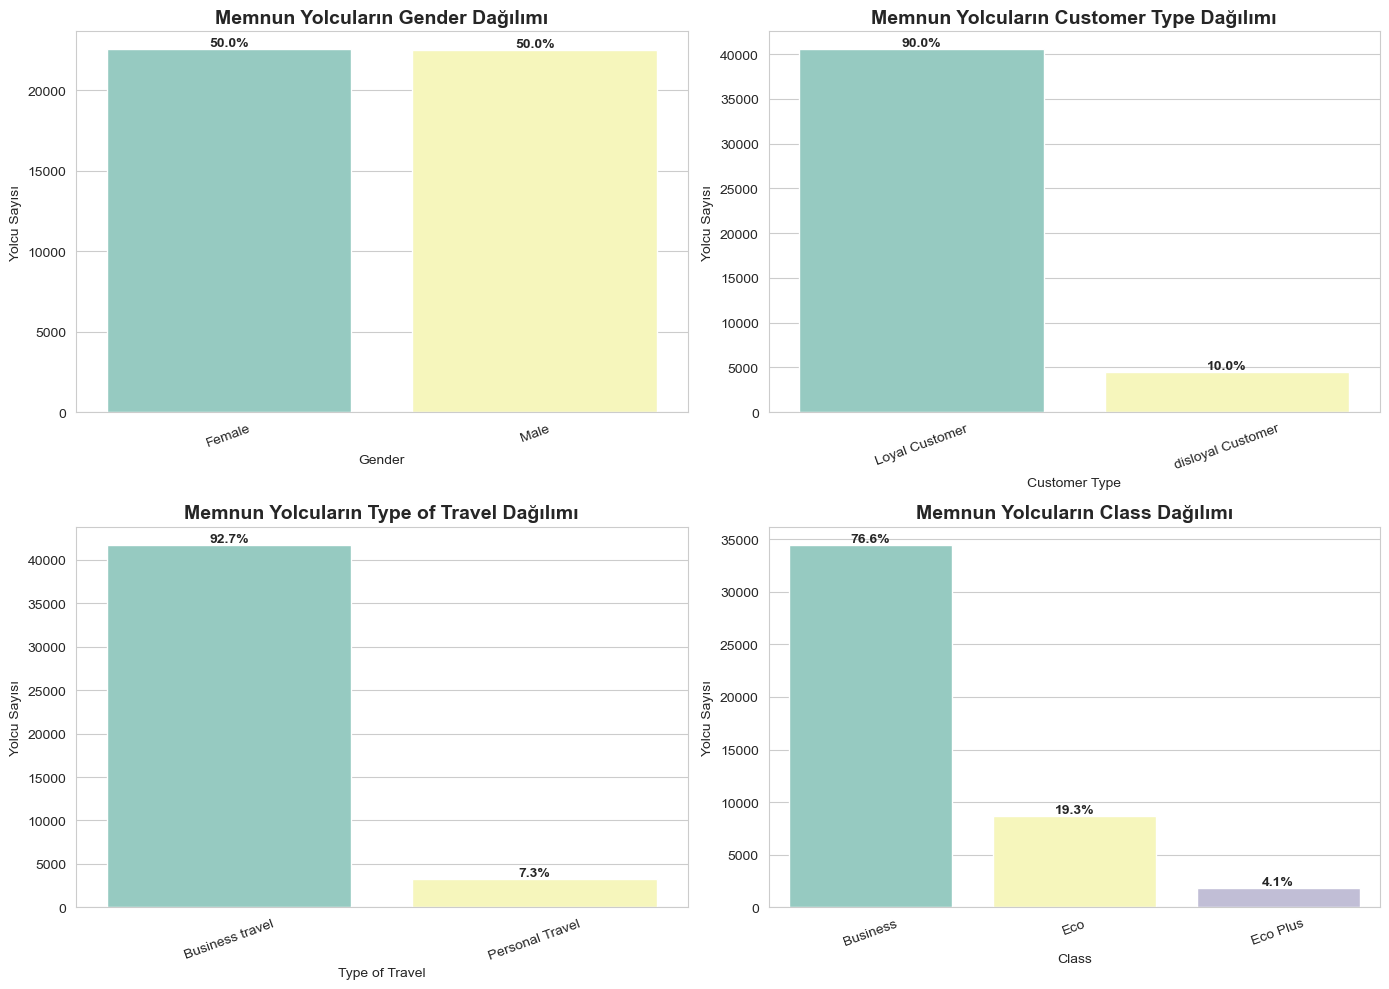

In [272]:
categorical_factors = ["Gender", "Customer Type", "Type of Travel", "Class"]
palette = sns.color_palette("Set3")

plt.figure(figsize=(14, 10))

for i, col in enumerate(categorical_factors, 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(data=satisfied, x=col, palette=palette)
    plt.title(f"Memnun Yolcuların {col} Dağılımı", fontsize=14, fontweight='bold')
    plt.ylabel("Yolcu Sayısı")
    plt.xlabel(col)
    plt.xticks(rotation=20)

    # Yüzdeleri hesapla ve bar üstlerine yaz
    total = len(satisfied)
    for p in ax.patches:
        count = p.get_height()
        percentage = 100 * count / total
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2, count),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

**Özet:**

- Memnun yolcular çoğunlukla cinsiyet açısından dengeli (yaklaşık %50-50).
- Sadık müşterilerin memnuniyet oranı oldukça yüksek (%90).
- İş seyahati yapan yolcular ve Business sınıfındaki yolcular memnuniyet oranı en yüksek gruplar.
- Hizmet kalitesi puanları genel olarak yüksek; özellikle online boarding, koltuk konforu ve bagaj işlemleri ön planda.
- Gecikmeler ortalama düşük, ancak maksimum değerlerde aşırı uçlar mevcut.


# Yolcu Profili ve Segmentasyonu

Müşteri Türü Dağılımı:
Customer Type
Loyal Customer       81.732176
disloyal Customer    18.267824
Name: proportion, dtype: float64


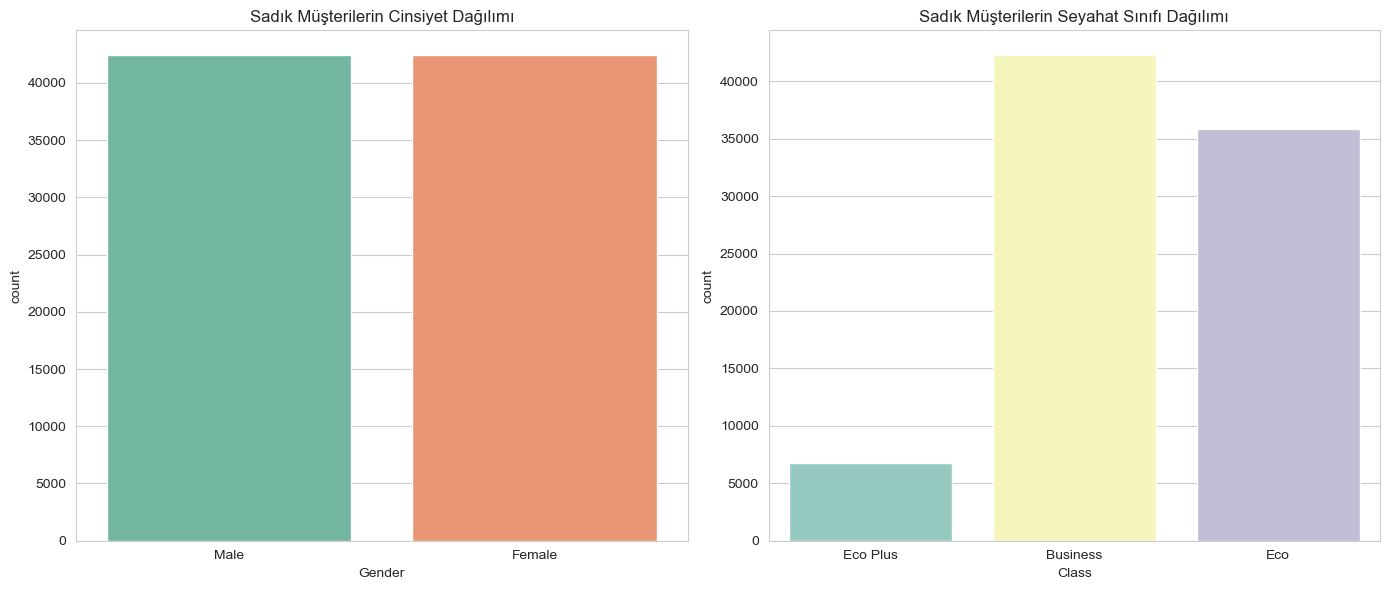

In [289]:
# Sadık (Loyal) ve sadık olmayan müşteri sayısı
print("Müşteri Türü Dağılımı:")
print(train['Customer Type'].value_counts(normalize=True) * 100)

# Sadık müşterilerin cinsiyet ve seyahat sınıfı dağılımı
loyal_customers = train[train['Customer Type'] == 'Loyal Customer']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=loyal_customers, x='Gender', palette='Set2')
plt.title('Sadık Müşterilerin Cinsiyet Dağılımı')

plt.subplot(1, 2, 2)
sns.countplot(data=loyal_customers, x='Class', palette='Set3')
plt.title('Sadık Müşterilerin Seyahat Sınıfı Dağılımı')

plt.tight_layout()
plt.show()


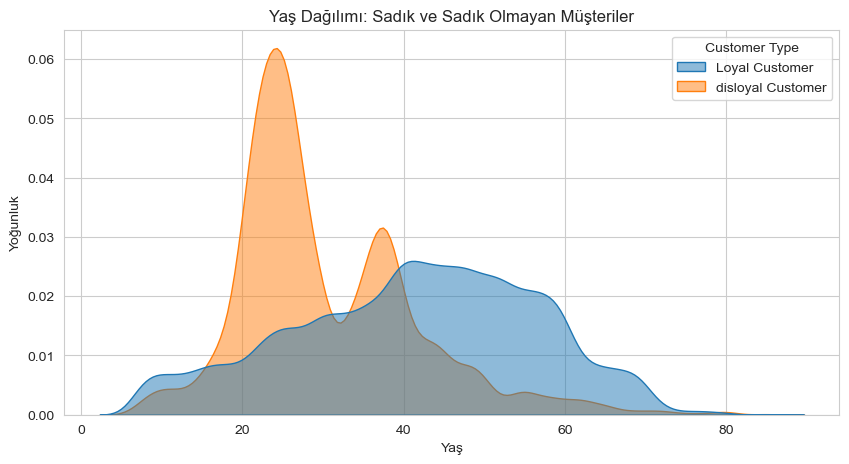

In [290]:
# Yaş dağılımı - Sadık vs Sadık olmayan
plt.figure(figsize=(10, 5))
sns.kdeplot(data=train, x='Age', hue='Customer Type', fill=True, common_norm=False, alpha=0.5)
plt.title('Yaş Dağılımı: Sadık ve Sadık Olmayan Müşteriler')
plt.xlabel('Yaş')
plt.ylabel('Yoğunluk')
plt.show()


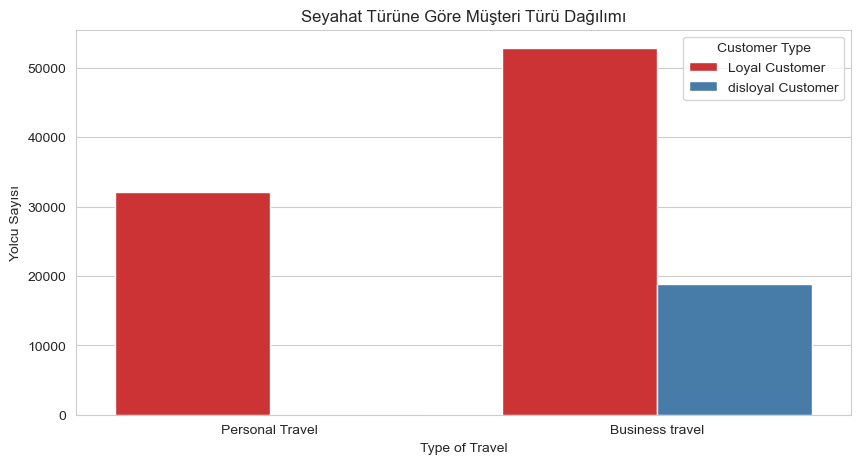

In [293]:
# Seyahat türüne göre müşteri sayısı (Sadık ve sadık olmayan)
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='Type of Travel', hue='Customer Type', palette='Set1')
plt.title('Seyahat Türüne Göre Müşteri Türü Dağılımı')
plt.ylabel('Yolcu Sayısı')
plt.show()


In [297]:
# Daha detaylı segmentasyon tablosu (pivot table)
segment_table = pd.pivot_table(train, index=['Customer Type'], 
                               columns=['Gender', 'Type of Travel', 'Class'],
                               values='Age', aggfunc='count', fill_value=0)

print("Segmentasyon Tablosu (Yaş sayısı üzerinden):")
segment_table

Segmentasyon Tablosu (Yaş sayısı üzerinden):


Gender                     Female                                        \
Type of Travel    Business travel                Personal Travel          
Class                    Business   Eco Eco Plus        Business    Eco   
Customer Type                                                             
Loyal Customer              20047  4738     1559            1068  13225   
disloyal Customer            3805  5817      562               7     78   

Gender                                Male                                 \
Type of Travel             Business travel                Personal Travel   
Class             Eco Plus        Business   Eco Eco Plus        Business   
Customer Type                                                               
Loyal Customer        1821           20116  4758     1620            1078   
disloyal Customer        0            3540  4944      149               4   

Gender                             
Type of Travel                     
Class                Eco Eco Plus  
Customer Type                      
Loyal Customer     13114     1779  
disloyal Customer     71        4

# Yolcu Segmentasyon Tablosu

Aşağıdaki tablo, yolcuların **Müşteri Türü** (Sadık / Sadık Olmayan), **Cinsiyet**, **Seyahat Türü** (İş / Kişisel), ve **Seyahat Sınıfı** (Business, Eco, Eco Plus) bazında sayılarını göstermektedir.

| Müşteri Türü     | Cinsiyet | Seyahat Türü      | Business | Eco   | Eco Plus |
|------------------|----------|-------------------|----------|-------|----------|
| Sadık Müşteri    | Kadın    | İş Seyahati       | 20,047   | 4,738 | 1,559    |
| Sadık Müşteri    | Kadın    | Kişisel Seyahat   | 1,068    | 13,225| -        |
| Sadık Müşteri    | Erkek    | İş Seyahati       | 20,116   | 4,758 | 1,620    |
| Sadık Müşteri    | Erkek    | Kişisel Seyahat   | 1,078    | -     | -        |
| Sadık Olmayan    | Kadın    | İş Seyahati       | 3,805    | 5,817 | 562      |
| Sadık Olmayan    | Kadın    | Kişisel Seyahat   | 7        | 78    | -        |
| Sadık Olmayan    | Erkek    | İş Seyahati       | 3,540    | 4,944 | 149      |
| Sadık Olmayan    | Erkek    | Kişisel Seyahat   | 4        | -     | -        |

> *Not:* Eksik veya sıfır olan hücreler tabloda boş bırakılmıştır.

### Değerlendirme

- Sadık müşteriler çoğunlukla **iş seyahati** yapan ve **business** veya **eco** sınıfını tercih eden yolculardır.
- Sadık olmayan müşteriler ise özellikle kadınlarda kişisel seyahatlerde **eco** sınıfını daha çok tercih etmektedir.
- Erkek yolcuların iş seyahati ve business sınıfı tercihleri sadık müşteriler arasında oldukça yüksektir.
- Kişisel seyahatlerde sadık olmayan yolcu sayısı oldukça düşük görünmektedir.
